#  real case study of the grain size 

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage import io, color, measure
import pandas as pd

IOStream.flush timed out


In [2]:
img_path = './images/grains/grains2.jpg'
img = cv2.imread(img_path, 0)

1 pixel = 0.5um 

In [3]:
pixels_to_um = 0.5

plot the histogram of the image

In [4]:
ret, thresh = cv2.threshold(img, 0,255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret

157.0

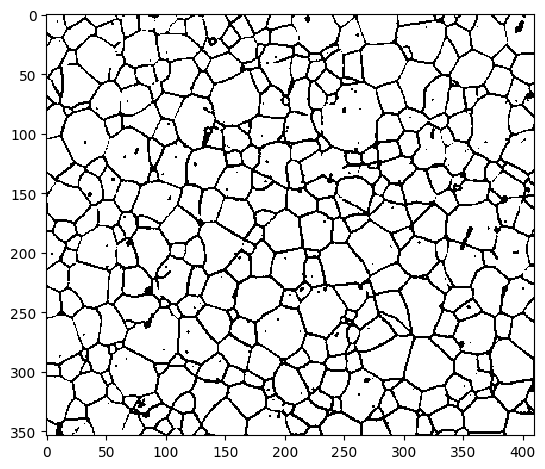

In [5]:
io.imshow(thresh)

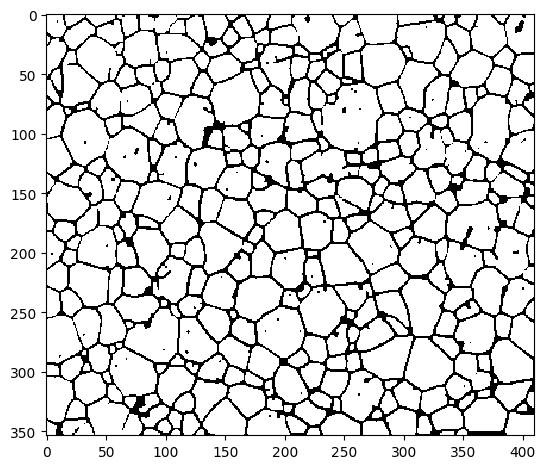

In [6]:
kernel = np.ones((3,3), np.uint8)
eroded = cv2.erode(thresh, kernel, iterations=1)
dilated = cv2.dilate(eroded, kernel, iterations=1)
io.imshow(dilated)

morphology open is exactly same as erode then dilate

In [7]:
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
print("mean of dilated is {}, mean of opened is {}".format(np.mean(np.mean(dilated)), np.mean(np.mean(opening))))

mean of dilated is 209.01426209177345, mean of opened is 209.01426209177345


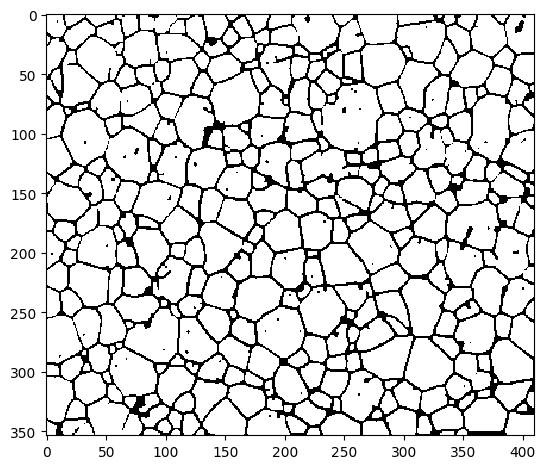

In [8]:
io.imshow(opening)

convert the opened image to a binary image

In [9]:
mask = dilated==255

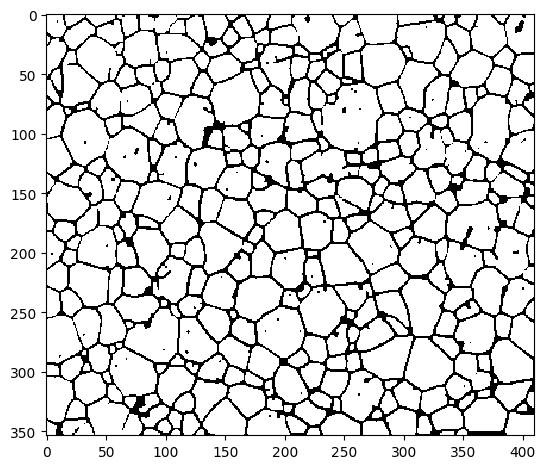

In [10]:
io.imshow(mask)

label grains in the masked image

ndimage has function to label the connected objects in the image, a structure is need to define how does the object is connected, the connection strucure is 8-connected. 

In [11]:
s = [[1,1,1],[1,1,1],[1,1,1]]
labeled_mask, num_labels = ndimage.label(mask,structure=s)

adding color to the labeled mask with color.label2rgb()

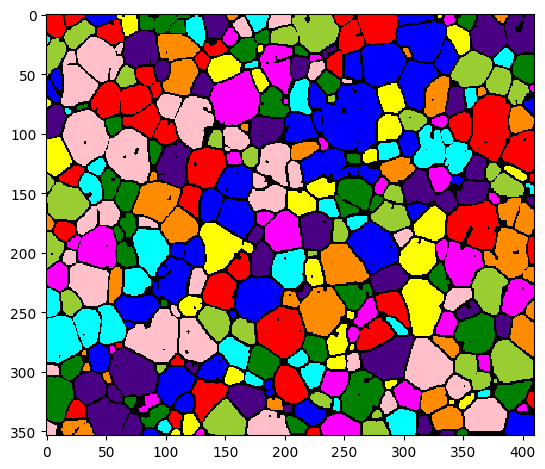

In [12]:
img2 = color.label2rgb(labeled_mask, bg_label=0)
io.imshow(img2)

Measure the grain size, with skimage.measure function

In [13]:
clusters = measure.regionprops(labeled_mask, img)

clusters has a couple of properties, here shows first five in the list, their label and area 

In [14]:
for prop in clusters[:5]:
    print('label {} Area is {}'.format(prop.label, prop.area))

label 1 Area is 415
label 2 Area is 187
label 3 Area is 221
label 4 Area is 12
label 5 Area is 524


A better way to present the data is to write the properties into a csv file, with computations convert the pixels to length and area

In [15]:
propList = ['Area',
            'equivalent_diameter',
            'orientation',
            'MajorAxisLength',
            'MinorAxisLength',
            'Perimeter',
            'MinIntensity',
            'MeanIntensity',
            'MaxIntensity']

In [16]:
output_file = open('image_measurement.csv','w')

write the first row header

In [17]:
output_file.write((','+",".join(propList)+'\n'))
for cluster_props in clusters:
    output_file.write(str(cluster_props['Label']))
    for i, prop in enumerate(propList):
        if (prop == 'Area'):
            to_print = cluster_props[prop]*pixels_to_um**2
        elif (prop == 'orientation'):
            to_print = cluster_props[prop]*57.2958
        elif (prop.find('Intensity')<0):
            to_print = cluster_props[prop]*pixels_to_um
        else:
            to_print = cluster_props[prop]
        output_file.write(','+str(to_print))
    output_file.write('\n')

In [18]:
df = pd.read_csv('image_measurement.csv')
df.head()

,Unnamed: 0,Area,equivalent_diameter,orientation,MajorAxisLength,MinorAxisLength,Perimeter,MinIntensity,MeanIntensity,MaxIntensity
0,1,103.75,11.493416,-70.356485,17.358506,9.586266,59.091883,158.0,208.997590,230.0
1,2,46.75,7.715177,-86.645983,12.348231,5.244353,29.192388,158.0,210.283422,227.0
2,3,55.25,8.387281,16.517869,10.121082,7.894460,32.899495,159.0,208.389140,232.0
3,4,3.00,1.954410,90.000032,3.415650,1.000000,6.000000,159.0,199.333333,225.0
4,5,131.00,12.914890,-88.175966,22.446721,8.987303,77.574116,158.0,206.746183,230.0


cv2 has also connected components analysis function

In [26]:
contours, hierarchy = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img, contours, -1, (0,0,255), 3)
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()